In [24]:

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from IPython.display import display
lemmatizer = nltk.WordNetLemmatizer()

#word tokenizeing and part-of-speech tagger
#document = 'The little brown dog barked at the black cat'
document = 'Attended site to check lift alarm checked phoneline ok checked wiring connections found loose connections on car top ETMA unit Repaired and tested to NCC all ok LIS'

tokens = [nltk.word_tokenize(sent) for sent in [document]]
postag = [nltk.pos_tag(sent) for sent in tokens][0]

# Rule for NP chunk and VB Chunk
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        
"""
#Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() =='NP'):
        yield subtree.leaves()
        
def get_word_postag(word):
    if pos_tag([word])[0][1].startswith('J'):
        return wordnet.ADJ
    if pos_tag([word])[0][1].startswith('V'):
        return wordnet.VERB
    if pos_tag([word])[0][1].startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN
    
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    postag = get_word_postag(word)
    word = lemmatizer.lemmatize(word,postag)
    return word

def get_terms(tree):    
    for leaf in leaves(tree):
        #print(leaf)
        terms = [normalise(w) for w,t in leaf]
        yield terms

terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

[('Attended', 'NNP'), ('site', 'NN')]
[('check', 'VB')]
[('lift', 'JJ'), ('alarm', 'NN')]
[('checked', 'VBD')]
[('phoneline', 'JJ'), ('ok', 'NN')]
[('checked', 'VBD')]
[('wiring', 'JJ'), ('connections', 'NNS')]
[('found', 'VBD')]
[('loose', 'JJ'), ('connections', 'NNS')]
[('car', 'NN'), ('top', 'JJ'), ('ETMA', 'NNP'), ('unit', 'NN'), ('Repaired', 'NNP')]
[('tested', 'VBN')]
[('NCC', 'NNP')]
[('ok', 'VBP')]
[('LIS', 'NNP')]


['attend site',
 'check',
 'lift alarm',
 'checked',
 'phoneline ok',
 'checked',
 'wiring connection',
 'found',
 'loose connection',
 'car top etma unit repair',
 'test',
 'ncc',
 'ok',
 'li']

In [20]:
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

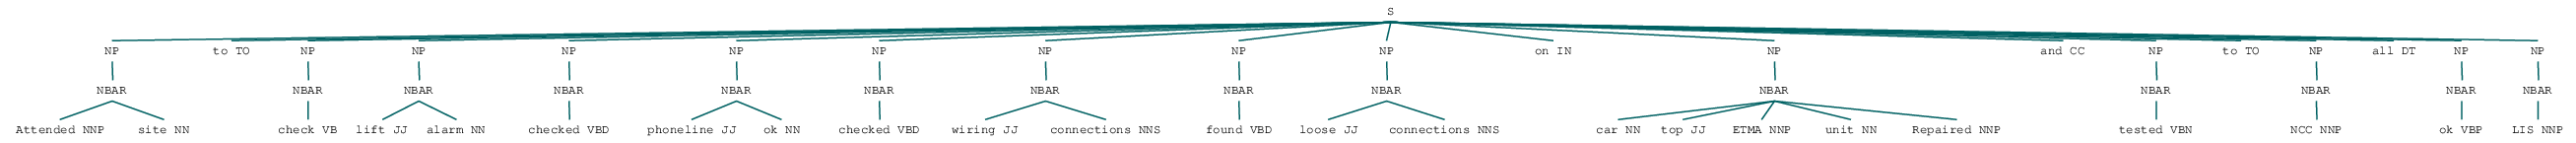

In [51]:
tree

In [43]:
#word tokenizeing and part-of-speech tagger
document = ['Attended site to check lift alarm checked phoneline ok checked wiring connections found loose connections on car top ETMA unit Repaired and tested to NCC all ok LIS', 'The little brown dog barked at the black cat']
            
tokens = [nltk.word_tokenize(sent) for sent in document]
postag = [nltk.pos_tag(sent) for sent in tokens][0]


#Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)


In [44]:
terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

[('Attended', 'NNP'), ('site', 'NN')]
[('check', 'VB')]
[('lift', 'JJ'), ('alarm', 'NN')]
[('checked', 'VBD')]
[('phoneline', 'JJ'), ('ok', 'NN')]
[('checked', 'VBD')]
[('wiring', 'JJ'), ('connections', 'NNS')]
[('found', 'VBD')]
[('loose', 'JJ'), ('connections', 'NNS')]
[('car', 'NN'), ('top', 'JJ'), ('ETMA', 'NNP'), ('unit', 'NN'), ('Repaired', 'NNP')]
[('tested', 'VBN')]
[('NCC', 'NNP')]
[('ok', 'VBP')]
[('LIS', 'NNP')]


['attend site',
 'check',
 'lift alarm',
 'checked',
 'phoneline ok',
 'checked',
 'wiring connection',
 'found',
 'loose connection',
 'car top etma unit repair',
 'test',
 'ncc',
 'ok',
 'li']

In [77]:
# word tokenizeing and part-of-speech tagger
# document = 'The little brown dog barked at the black cat'
document = ["Attended site to check lift alarm checked phoneline ok checked wiring connections found loose connections on car top ETMA unit Repaired and tested to NCC all ok LIS","A little dog chased small cat"]

tokens = [nltk.word_tokenize(sent) for sent in document]
postag = [nltk.pos_tag(sent) for sent in tokens]

postag[1]

[('A', 'DT'),
 ('little', 'JJ'),
 ('dog', 'NN'),
 ('chased', 'VBD'),
 ('small', 'JJ'),
 ('cat', 'NN')]

In [74]:
# word tokenizeing and part-of-speech tagger
# document = 'The little brown dog barked at the black cat'
document = "Attended site to check lift alarm checked phoneline ok checked wiring connections found loose connections on car top ETMA unit Repaired and tested to NCC all ok LIS"

tokens = [nltk.word_tokenize(sent) for sent in [document]]
postag = [nltk.pos_tag(sent) for sent in tokens][0]

# Rule for NP chunk and VB Chunk
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        
"""
# Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)


[('Attended', 'NNP'), ('site', 'NN'), ('to', 'TO'), ('check', 'VB'), ('lift', 'JJ'), ('alarm', 'NN'), ('checked', 'VBD'), ('phoneline', 'JJ'), ('ok', 'NN'), ('checked', 'VBD'), ('wiring', 'JJ'), ('connections', 'NNS'), ('found', 'VBD'), ('loose', 'JJ'), ('connections', 'NNS'), ('on', 'IN'), ('car', 'NN'), ('top', 'JJ'), ('ETMA', 'NNP'), ('unit', 'NN'), ('Repaired', 'NNP'), ('and', 'CC'), ('tested', 'VBN'), ('to', 'TO'), ('NCC', 'NNP'), ('all', 'DT'), ('ok', 'VBP'), ('LIS', 'NNP')]


In [76]:

terms = get_terms(tree)

features = []
for term in terms:
    _term = ""
    for word in term:
        _term += " " + word
    features.append(_term.strip())
features

[('Attended', 'NNP'), ('site', 'NN')]
[('check', 'VB')]
[('lift', 'JJ'), ('alarm', 'NN')]
[('checked', 'VBD')]
[('phoneline', 'JJ'), ('ok', 'NN')]
[('checked', 'VBD')]
[('wiring', 'JJ'), ('connections', 'NNS')]
[('found', 'VBD')]
[('loose', 'JJ'), ('connections', 'NNS')]
[('car', 'NN'), ('top', 'JJ'), ('ETMA', 'NNP'), ('unit', 'NN'), ('Repaired', 'NNP')]
[('tested', 'VBN')]
[('NCC', 'NNP')]
[('ok', 'VBP')]
[('LIS', 'NNP')]


['attend site',
 'check',
 'lift alarm',
 'checked',
 'phoneline ok',
 'checked',
 'wiring connection',
 'found',
 'loose connection',
 'car top etma unit repair',
 'test',
 'ncc',
 'ok',
 'li']

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
from utils.utils import GetVerbsNouns

In [101]:
documents = ["Attended site to check lift alarm checked phoneline ok checked wiring connections found loose connections on car top ETMA unit Repaired and tested to NCC all ok LIS","A little dog chased small cat", "Dog chased a cat into the wood"]

iterator_get_VN = GetVerbsNouns(documents)

In [104]:
#%pdb
for i in iterator_get_VN:
    print(i)

['attend site', 'check', 'lift alarm', 'checked', 'phoneline ok', 'checked', 'wiring connection', 'found', 'loose connection', 'car top etma unit repair', 'test', 'ncc', 'ok', 'li']
['little dog', 'chase', 'small cat']
['dog', 'chase', 'cat', 'wood']
